<a href="https://colab.research.google.com/github/Ronnakorn2004/Superstore-Dashboard/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read a file from GoogleDrive.
file_path = '/content/drive/MyDrive/Colab Notebooks/Superstore.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [6]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
import os
data_path = '/content/drive/MyDrive/Colab Notebooks/Superstore.csv'
print(os.path.exists(data_path))

True


In [8]:
raw_path = '/content/drive/MyDrive/Colab Notebooks/Superstore.csv'
clean_path = raw_path.replace('Superstore.csv', 'superstore_clean.csv')
db_path = raw_path.replace('Superstore.csv', 'superstore.db')


In [9]:
print("raw_path exists?", os.path.exists(raw_path))
print("clean_path will be:", clean_path)
print("db_path will be:", db_path)

raw_path exists? True
clean_path will be: /content/drive/MyDrive/Colab Notebooks/superstore_clean.csv
db_path will be: /content/drive/MyDrive/Colab Notebooks/superstore.db


Check type data, missing and duplicates

In [10]:
print(df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample duplicates:", df.duplicated().sum())
# check date column names
print("Date columns found:", [c for c in df.columns if 'date' in c.lower()])

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Sample duplicates: 0
Date colu

Cleaning & Feature Engineering

In [11]:
# Convert date columns
clean = df.copy()

clean['Order Date'] = pd.to_datetime(clean['Order Date'], errors='coerce')
clean['Ship Date'] = pd.to_datetime(clean['Ship Date'], errors='coerce')

# Create date parts
clean['OrderYear'] = clean['Order Date'].dt.year
clean['OrderMonth'] = clean['Order Date'].dt.to_period('M').astype(str)
clean['OrderQuarter'] = clean['Order Date'].dt.to_period('Q').astype(str)
clean['OrderMonthNum'] = clean['Order Date'].dt.month

# Profit Margin
clean['ProfitMargin'] = (clean['Profit'] / clean['Sales']).replace([np.inf, -np.inf], np.nan).fillna(0).round(4)

# Show first rows
clean.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,OrderYear,OrderMonth,OrderQuarter,OrderMonthNum,ProfitMargin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11,2016Q4,11,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11,2016Q4,11,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06,2016Q2,6,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10,2015Q4,10,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10,2015Q4,10,0.1125


In [12]:
clean_path = '/content/drive/MyDrive/Colab Notebooks/superstore_clean.csv'
clean.to_csv(clean_path, index=False)
print("Saved cleaned CSV to:", clean_path)

Saved cleaned CSV to: /content/drive/MyDrive/Colab Notebooks/superstore_clean.csv


SQLite

In [13]:
# export sqlite
import sqlite3
conn = sqlite3.connect(db_path)
clean.to_sql('fact_sales', conn, if_exists='replace', index=False)
conn.close()
print("Saved SQLite DB to:", db_path)

Saved SQLite DB to: /content/drive/MyDrive/Colab Notebooks/superstore.db


In [14]:
# ปรับ path ให้ตรงกับที่ไฟล์ .db และ .sql
db_path = '/content/drive/MyDrive/Colab Notebooks/superstore.db'
sql_path = '/content/drive/MyDrive/Colab Notebooks/queries.sql'

In [15]:
# สร้างไฟล์ queries.sql ที่ว่างเปล่า หากยังไม่มี
sql_file_path = '/content/drive/MyDrive/Colab Notebooks/queries.sql'
if not os.path.exists(sql_file_path):
    with open(sql_file_path, 'w', encoding='utf-8') as f:
        f.write('-- Your SQL queries go here\n')
    print(f"Created empty queries.sql at: {sql_file_path}")
else:
    print(f"queries.sql already exists at: {sql_file_path}")


queries.sql already exists at: /content/drive/MyDrive/Colab Notebooks/queries.sql


In [16]:
conn = sqlite3.connect(db_path)
with open(sql_path, 'r', encoding='utf-8') as f:
    sql_script = f.read()
print("queries.sql content loaded successfully.")

queries.sql content loaded successfully.


In [17]:
conn = sqlite3.connect(db_path)
conn.executescript(sql_script)
conn.close()

print("All SQL views and queries executed successfully!")

All SQL views and queries executed successfully!


In [18]:
conn = sqlite3.connect(db_path)
tables = pd.read_sql_query("""
SELECT name, type FROM sqlite_master
WHERE type IN ('table','view')
ORDER BY type, name;
""", conn)
conn.close()

tables

,name,type
0,fact_sales,table
1,vw_customer_lifetime,view
2,vw_monthly_sales,view
3,vw_region_category,view


In [19]:
# show first 800 characters of queries.sql to confirm content
sql_path = '/content/drive/MyDrive/Colab Notebooks/queries.sql'   # ปรับถ้าคุณเก็บไว้ที่อื่น
with open(sql_path, 'r', encoding='utf-8') as f:
    preview = f.read(800)   # เปลี่ยนจำนวนตัวอักษรถ้าต้องการดูมากขึ้น
print("----- queries.sql preview (first 800 chars) -----")
print(preview)
print("----- EOF preview -----")

----- queries.sql preview (first 800 chars) -----

-- View: Monthly Sales
DROP VIEW IF EXISTS vw_monthly_sales;
CREATE VIEW vw_monthly_sales AS
SELECT 
    strftime('%Y-%m', "Order Date") AS month,
    MIN("Order Date") AS period_start,
    SUM(Sales) AS total_sales,
    SUM(Profit) AS total_profit,
    COUNT(DISTINCT "Order ID") AS orders_count
FROM fact_sales
GROUP BY month
ORDER BY month;

-- View: Region x Category Summary
DROP VIEW IF EXISTS vw_region_category;
CREATE VIEW vw_region_category AS
SELECT 
    Region,
    Category,
    SUM(Sales) AS sales,
    SUM(Profit) AS profit,
    ROUND(CASE WHEN SUM(Sales)=0 THEN 0 ELSE (SUM(Profit)/SUM(Sales)) END, 4) AS profit_margin
FROM fact_sales
GROUP BY Region, Category
ORDER BY Region, sales DESC;

-- View: Customer Lifetime Value
DROP VIEW IF EXISTS vw_customer_lifetime;
CREATE VIEW vw_cu
----- EOF preview -----


In [20]:
sql_content = """
-- View: Monthly Sales
DROP VIEW IF EXISTS vw_monthly_sales;
CREATE VIEW vw_monthly_sales AS
SELECT
    strftime('%Y-%m', "Order Date") AS month,
    MIN("Order Date") AS period_start,
    SUM(Sales) AS total_sales,
    SUM(Profit) AS total_profit,
    COUNT(DISTINCT "Order ID") AS orders_count
FROM fact_sales
GROUP BY month
ORDER BY month;

-- View: Region x Category Summary
DROP VIEW IF EXISTS vw_region_category;
CREATE VIEW vw_region_category AS
SELECT
    Region,
    Category,
    SUM(Sales) AS sales,
    SUM(Profit) AS profit,
    ROUND(CASE WHEN SUM(Sales)=0 THEN 0 ELSE (SUM(Profit)/SUM(Sales)) END, 4) AS profit_margin
FROM fact_sales
GROUP BY Region, Category
ORDER BY Region, sales DESC;

-- View: Customer Lifetime Value
DROP VIEW IF EXISTS vw_customer_lifetime;
CREATE VIEW vw_customer_lifetime AS
SELECT
    "Customer ID" AS customer_id,
    "Customer Name" AS customer_name,
    MIN(strftime('%Y', "Order Date")) AS first_order_year,
    SUM(Sales) AS lifetime_sales,
    SUM(Profit) AS lifetime_profit,
    COUNT(DISTINCT "Order ID") AS total_orders
FROM fact_sales
GROUP BY "Customer ID", "Customer Name"
ORDER BY lifetime_sales DESC;
"""

sql_path = '/content/drive/MyDrive/Colab Notebooks/queries.sql'

with open(sql_path, 'w', encoding='utf-8') as f:
    f.write(sql_content)

print("Successfully wrote SQL views into:", sql_path)

Successfully wrote SQL views into: /content/drive/MyDrive/Colab Notebooks/queries.sql


In [21]:
conn = sqlite3.connect(db_path)
conn.executescript(sql_content)
conn.close()

print("All SQL views created inside database!")

All SQL views created inside database!


In [22]:
conn = sqlite3.connect(db_path)
tables = pd.read_sql_query("""
SELECT name, type
FROM sqlite_master
WHERE type IN ('table','view')
ORDER BY type, name;
""", conn)
conn.close()
tables

,name,type
0,fact_sales,table
1,vw_customer_lifetime,view
2,vw_monthly_sales,view
3,vw_region_category,view


In [23]:
print(clean.head())
print(clean.shape)

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

                                        Product Name     Sales Quantity  \
0                  Bush Somer

ยอดขายรายเดือน (trend)

In [24]:
import sqlite3, pandas as pd
conn = sqlite3.connect(db_path)

df_month = pd.read_sql_query("SELECT * FROM vw_monthly_sales ORDER BY month;", conn)
display(df_month)

conn.close()

,month,period_start,total_sales,total_profit,orders_count
0,2014-01,2014-01-03 00:00:00,14236.8950,2450.1907,32
1,2014-02,2014-02-01 00:00:00,4519.8920,862.3084,28
2,2014-03,2014-03-01 00:00:00,55691.0090,498.7299,71
3,2014-04,2014-04-01 00:00:00,28295.3450,3488.8352,66
4,2014-05,2014-05-02 00:00:00,23648.2870,2738.7096,69
5,2014-06,2014-06-01 00:00:00,34595.1276,4976.5244,66
6,2014-07,2014-07-01 00:00:00,33946.3930,-841.4826,65
7,2014-08,2014-08-01 00:00:00,27909.4685,5318.1050,72
8,2014-09,2014-09-01 00:00:00,81777.3508,8328.0994,130
9,2014-10,2014-10-01 00:00:00,31453.3930,3448.2573,78


In [25]:
conn = sqlite3.connect(db_path)
top_products = pd.read_sql_query("""
SELECT "Product Name" AS product_name, SUM(Sales) AS total_sales, SUM(Profit) AS total_profit
FROM fact_sales
GROUP BY "Product Name"
ORDER BY total_sales DESC
LIMIT 10;
""", conn)
display(top_products)
conn.close()

,product_name,total_sales,total_profit
0,Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7.753039e+03
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1.811078e+03
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,5.684342e-14
4,GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,7.609800e+02
6,Hewlett Packard LaserJet 3310 Copier,18839.686,6.983884e+03
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,4.094977e+03
8,GBC DocuBind P400 Electric Binding System,17965.068,-1.878166e+03
9,High Speed Automatic Electric Letter Opener,17030.312,-2.620048e+02


ดูยอดขายรายเดือน (trend) + วิเคราะห์ MoM / YoY

In [26]:
import sqlite3, pandas as pd
conn = sqlite3.connect(db_path)

# monthly totals
df_month = pd.read_sql_query("SELECT * FROM vw_monthly_sales ORDER BY month;", conn)
display(df_month)

# simple YoY: show same month last year by joining
sql = """
SELECT cur.month, cur.total_sales AS sales_curr, prev.total_sales AS sales_last_year,
       ROUND((cur.total_sales - prev.total_sales) / NULLIF(prev.total_sales,0),4) AS yoy_pct
FROM vw_monthly_sales cur
LEFT JOIN vw_monthly_sales prev
  ON substr(cur.month,6,2) = substr(prev.month,6,2)
  AND CAST(substr(cur.month,1,4) AS INTEGER) = CAST(substr(prev.month,1,4) AS INTEGER) + 1
ORDER BY cur.month;
"""
df_yoy = pd.read_sql_query(sql, conn)
display(df_yoy)

conn.close()


,month,period_start,total_sales,total_profit,orders_count
0,2014-01,2014-01-03 00:00:00,14236.8950,2450.1907,32
1,2014-02,2014-02-01 00:00:00,4519.8920,862.3084,28
2,2014-03,2014-03-01 00:00:00,55691.0090,498.7299,71
3,2014-04,2014-04-01 00:00:00,28295.3450,3488.8352,66
4,2014-05,2014-05-02 00:00:00,23648.2870,2738.7096,69
5,2014-06,2014-06-01 00:00:00,34595.1276,4976.5244,66
6,2014-07,2014-07-01 00:00:00,33946.3930,-841.4826,65
7,2014-08,2014-08-01 00:00:00,27909.4685,5318.1050,72
8,2014-09,2014-09-01 00:00:00,81777.3508,8328.0994,130
9,2014-10,2014-10-01 00:00:00,31453.3930,3448.2573,78


,month,sales_curr,sales_last_year,yoy_pct
0,2014-01,14236.8950,NaN,NaN
1,2014-02,4519.8920,NaN,NaN
2,2014-03,55691.0090,NaN,NaN
3,2014-04,28295.3450,NaN,NaN
4,2014-05,23648.2870,NaN,NaN
5,2014-06,34595.1276,NaN,NaN
6,2014-07,33946.3930,NaN,NaN
7,2014-08,27909.4685,NaN,NaN
8,2014-09,81777.3508,NaN,NaN
9,2014-10,31453.3930,NaN,NaN


ดู Sales by Region และ Category

In [27]:
conn = sqlite3.connect(db_path)
df_region = pd.read_sql_query("SELECT * FROM vw_region_category ORDER BY sales DESC LIMIT 100;", conn)
display(df_region)
conn.close()

,Region,Category,sales,profit,profit_margin
0,East,Technology,264973.9810,47462.0351,0.1791
1,West,Furniture,252612.7435,11504.9503,0.0455
2,West,Technology,251991.8320,44303.6496,0.1758
3,West,Office Supplies,220853.2490,52609.8490,0.2382
4,East,Furniture,208291.2040,3046.1658,0.0146
5,East,Office Supplies,205516.0550,41014.5791,0.1996
6,Central,Technology,170416.3120,33697.4320,0.1977
7,Central,Office Supplies,167026.4150,8879.9799,0.0532
8,Central,Furniture,163797.1638,-2871.0494,-0.0175
9,South,Technology,148771.9080,19991.8314,0.1344


Top customers & Customer lifetime

In [28]:
conn = sqlite3.connect(db_path)
top_customers = pd.read_sql_query("SELECT * FROM vw_customer_lifetime ORDER BY lifetime_sales DESC LIMIT 20;", conn)
display(top_customers)
conn.close()

,customer_id,customer_name,first_order_year,lifetime_sales,lifetime_profit,total_orders
0,SM-20320,Sean Miller,2014,25043.050,-1980.7393,5
1,TC-20980,Tamara Chand,2014,19052.218,8981.3239,5
2,RB-19360,Raymond Buch,2016,15117.339,6976.0959,6
3,TA-21385,Tom Ashbrook,2014,14595.620,4703.7883,4
4,AB-10105,Adrian Barton,2014,14473.571,5444.8055,10
5,KL-16645,Ken Lonsdale,2014,14175.229,806.8550,12
6,SC-20095,Sanjit Chand,2014,14142.334,5757.4119,9
7,HL-15040,Hunter Lopez,2014,12873.298,5622.4292,6
8,SE-20110,Sanjit Engle,2014,12209.438,2650.6769,11
9,CC-12370,Christopher Conant,2016,12129.072,2177.0493,5


วิเคราะห์ Top Product

In [29]:
conn = sqlite3.connect(db_path)
df_prod_detail = pd.read_sql_query("""
SELECT "Product Name", SUM(Sales) AS total_sales, SUM(Profit) AS total_profit, COUNT(*) AS tx_count
FROM fact_sales
GROUP BY "Product Name"
ORDER BY total_sales DESC
LIMIT 20;
""", conn)
display(df_prod_detail)
conn.close()

#ถ้า tx_count = 1 หรือ น้อย → รายการ high-price, low-frequency
#ถ้า tx_count สูง → best-seller volume

,Product Name,total_sales,total_profit,tx_count
0,Canon imageCLASS 2200 Advanced Copier,61599.8240,2.519993e+04,5
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.3840,7.753039e+03,10
2,Cisco TelePresence System EX90 Videoconferenci...,22638.4800,-1.811078e+03,1
3,HON 5400 Series Task Chairs for Big and Tall,21870.5760,5.684342e-14,8
4,GBC DocuBind TL300 Electric Binding System,19823.4790,2.233505e+03,11
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.5000,7.609800e+02,9
6,Hewlett Packard LaserJet 3310 Copier,18839.6860,6.983884e+03,8
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.8950,4.094977e+03,3
8,GBC DocuBind P400 Electric Binding System,17965.0680,-1.878166e+03,6
9,High Speed Automatic Electric Letter Opener,17030.3120,-2.620048e+02,3


Line chart ของ monthly

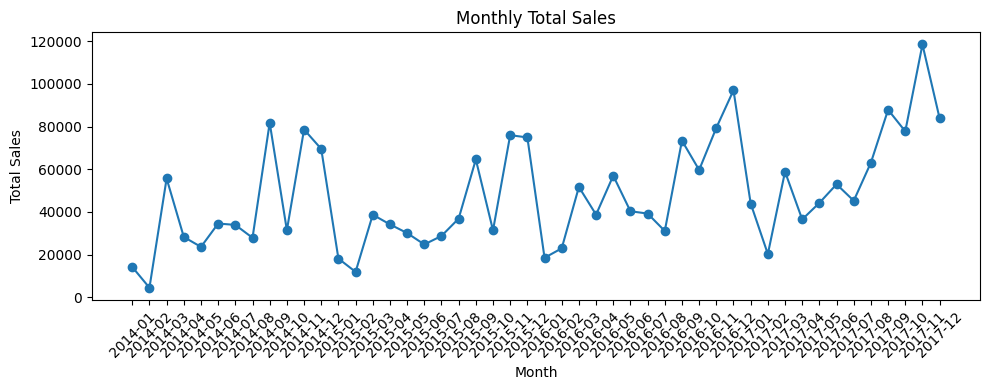

In [30]:
import matplotlib.pyplot as plt

# assume df_month from earlier, convert month to string already
plt.figure(figsize=(10,4))
plt.plot(df_month['month'], df_month['total_sales'], marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [31]:
df_month['month'] = pd.to_datetime(df_month['month'])

/tmp/ipython-input-3601798778.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(df_month['month'], df_month['total_sales'], linestyle='solid', marker='o')
/tmp/ipython-input-3601798778.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(df_month['month'], df_month['total_sales'], linestyle='solid', marker='o')


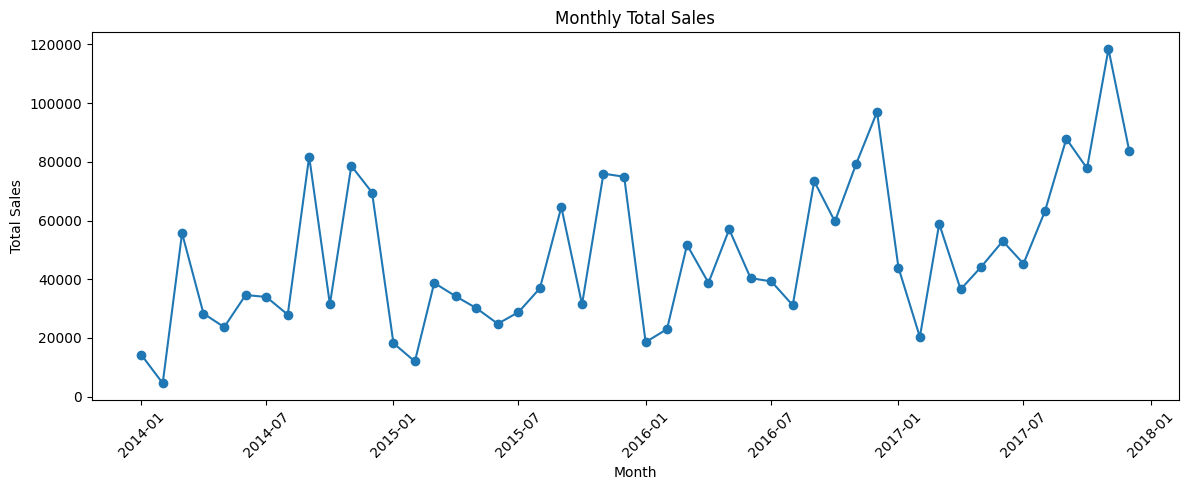

In [32]:
#ปรับเดือนให้ดูง่ายขึ้น
plt.figure(figsize=(12,5))
plt.plot_date(df_month['month'], df_month['total_sales'], linestyle='solid', marker='o')

plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()